In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

from scipy.integrate import odeint
from scipy.optimize import approx_fprime

In [324]:
x = np.linspace(-1, 1, 20)
y = x
[X, Y] = np.meshgrid(x, y)
Z = X**2 - Y**2
R = np.sqrt(X**2 + Y**2)

omega = 2.
def potential(r, t):
    x, y = r
    return (x * np.cos(omega*t) - y * np.sin(omega*t))**2 - \
                (x * np.sin(omega*t) + y * np.cos(omega*t))**2

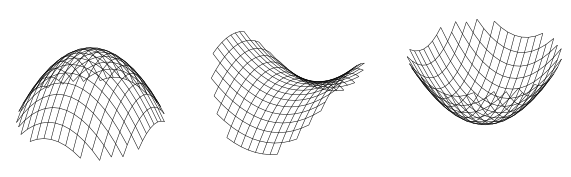

In [417]:
fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 3, 1, projection = "3d")
ax2 = fig.add_subplot(1, 3, 2, projection = "3d")
ax3 = fig.add_subplot(1, 3, 3, projection = "3d")
ax = [ax1, ax2, ax3]

xsign = [-1, 1, 1]
ysign = [-1, -1, 1]

for i in range(3):
    pot = xsign[i] * X**2 + ysign[i] * Y**2
    pot[R >= 1] = np.nan
    ax[i].plot_wireframe(X, Y, pot, lw = 0.5, ec = "k")
    ax[i].axis('off')
    ax[i].set_facecolor("none")
    
    RADIUS = 1.3
    ax[i].set_xlim3d(-RADIUS / 2, RADIUS / 2)
    ax[i].set_ylim3d(-RADIUS / 2, RADIUS / 2)

# fig.tight_layout()
fig.set_facecolor("none")
fig.savefig("potentials.png", dpi = 300)

(-1.1, 1.1, -1.1, 1.1)

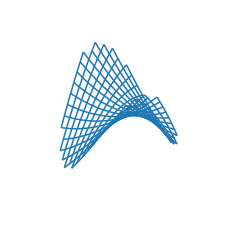

In [325]:
pot = potential([X, Y], 6.6)
pot[R >= 1] = np.nan

ax = plt.axes(projection = "3d")
ax.plot_wireframe(X, Y, pot)
ax.axis('off')

In [326]:
force = lambda r: -approx_fprime(r, lambda x: potential(x, 0))
force_t = lambda r, t: -approx_fprime(r, lambda x: potential(x, t))

In [333]:
def dydt(y, t):
    m = 1.2
    x, y, vx, vy = y
    # Fx, Fy = force([x, y])
    Fx, Fy = -force_t([x, y], t)
    dydt = [vx, vy, Fx/m, Fy/m]
    return dydt

In [369]:
tfin = 4*np.pi
tsteps = 300
times = np.linspace(0, tfin, tsteps)
sol = odeint(dydt, [0.2, 0.0, 0.0, 0.0], times)

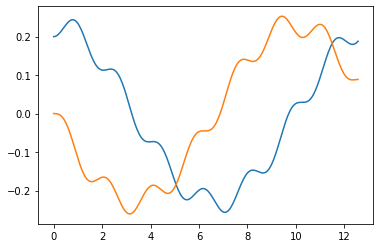

In [370]:
plt.plot(times, sol[:, 0])
plt.plot(times, sol[:, 1])

In [412]:
def animate(i):
    ax.clear()
    ax.axis('off')
    ax.set_facecolor("#f0f0f0")
    RADIUS = 1.3
    ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)
    
    cur_time = tfin*i/(tsteps - 1)
    pot = potential([X, Y], cur_time)
    pot[R >= 1] = np.nan
    
    ax.plot_wireframe(X, Y, pot, ec = "k", lw = 0.5)
    ax.scatter(sol[i, 0], sol[i, 1], potential([sol[i, 0], sol[i, 1]], cur_time),
              s = 100, color = "k")

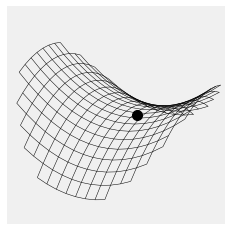

In [415]:
ax = plt.axes(projection = "3d")
animate(0)

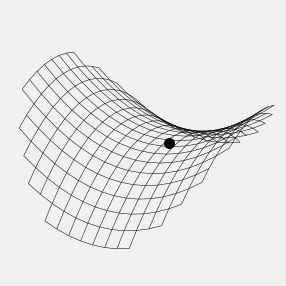

In [414]:
fig = plt.figure(figsize = (5, 5))
fig.tight_layout()
fig.patch.set_facecolor("#f0f0f0")
ax = fig.add_subplot(projection = "3d")
anim = FuncAnimation(fig, animate, frames = tsteps, interval = 40)
anim.save('paul-trap.gif', writer = 'imagemagick')